In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import sklearn

In [30]:
data = pd.read_csv("matches.csv")
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [31]:
data.shape

(756, 18)

In [32]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [33]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [34]:
data[['dl_applied','win_by_runs','win_by_wickets']].describe()

,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000
mean,0.025132,13.283069,3.350529
std,0.156630,23.471144,3.387963
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000
75%,0.000000,19.000000,6.000000
max,1.000000,146.000000,10.000000


In [35]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [36]:
data = data.iloc[:,:-1] # Remove last column since it has more than 90% null values.
data.dropna(inplace=True) # remove rows having null values

In [37]:
data.isnull().sum() # Recheck of null values.

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

# Find all unique values

In [38]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

### Delhi Daredevils and Delhi Capitals are same. 
### Sunrisers Hyderabad and Deccan Chargers are same.
### Rising Pune Supergiants are written twice.

In [39]:
# FOR DELHI 
data['team1'] = data['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data['team2'] = data['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
data['winner'] = data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')

In [40]:
# FOR HYDERABAD
data['team1'] = data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2'] = data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['winner'] = data['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [41]:
# FOR RISING PUNE
data['team1'] = data['team1'].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
data['team2'] = data['team2'].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
data['winner'] = data['winner'].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [42]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiantss'], dtype=object)

# Visualization

## How many matches each team won

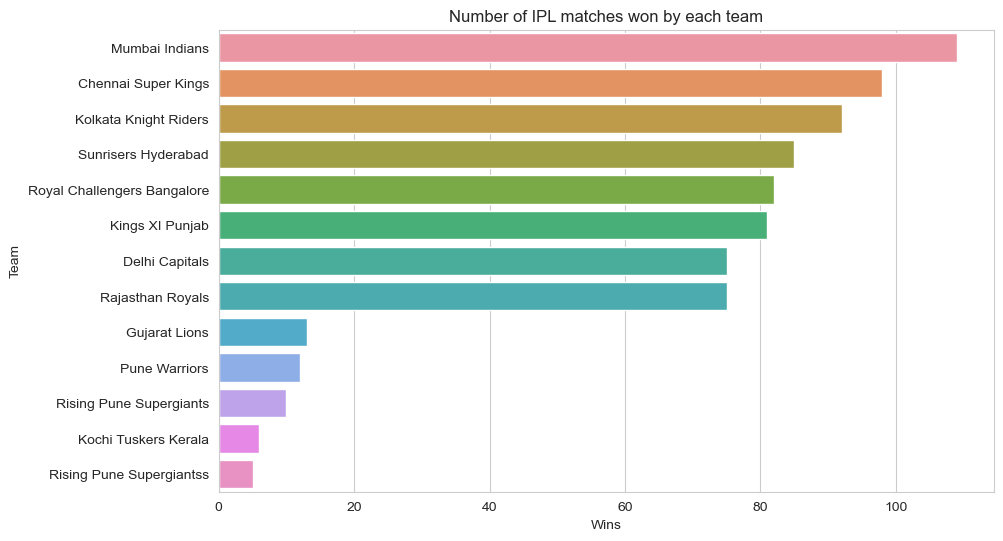

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(y='winner', data=data, order=data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title("Number of IPL matches won by each team")
plt.show()

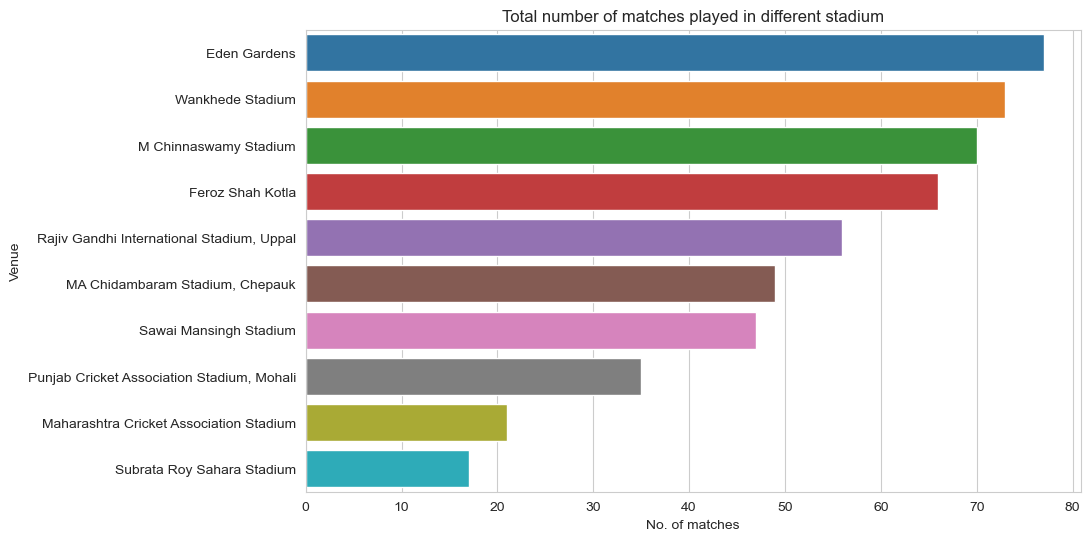

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(y='venue', data=data, order=data['venue'].value_counts().iloc[:10].index)
plt.xlabel('No. of matches')
plt.ylabel('Venue')
plt.title("Total number of matches played in different stadium")
plt.show()

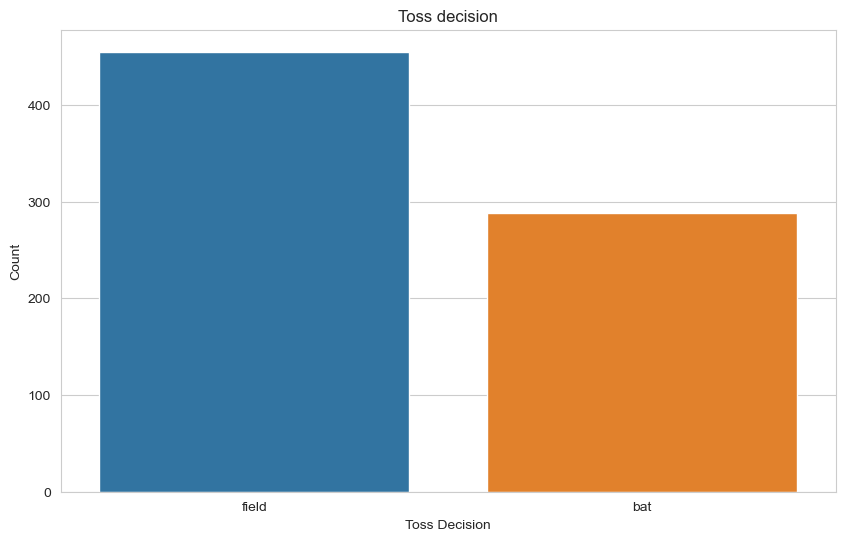

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='toss_decision', data=data)
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.title("Toss decision")
plt.show()

### Maximum toss decisions are to field than to bat.

# Feature engineering

In [46]:
data.drop(['id', 'venue','city', 'date', 'season','player_of_match', 'umpire1','umpire2'], axis=1, inplace=True)
data

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,umpire1,umpire2
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,AY Dandekar,NJ Llong
1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiants,0,7,A Nand Kishore,S Ravi
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,Nitin Menon,CK Nandan
3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,AK Chaudhary,C Shamshuddin
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,A Deshmukh,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...
750,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KN Ananthapadmanabhan,C Shamshuddin
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,Nanda Kishore,O Nandan
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,Nigel Llong,Nitin Menon
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,Sundaram Ravi,Bruce Oxenford


# ML Model making

In [50]:
X=data.drop(['winner'], axis=1)
y=data['winner']
X

,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,35,0
1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,0,10
3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,0,6
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,0,9
...,...,...,...,...,...,...,...,...
750,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,0,6
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,0,9
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,0,6
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,0,6


## Categoricals to numerals

In [51]:
x = pd.get_dummies(X, ['team1','team2','toss_winner','toss_decision','result'], drop_first=True)

In [52]:
x

,dl_applied,win_by_runs,win_by_wickets,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Pune Warriors,...,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_tie
0,0,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,7,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,10,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
751,0,0,9,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
752,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,0,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [54]:
y

array([12,  9,  5,  3, 12,  6,  3,  1,  6,  5,  6,  2,  5,  1,  6,  9,  5,
       12, 11, 12,  6,  2,  6,  9,  3,  5,  9,  5,  2,  5, 12,  9,  6,  3,
       12,  6,  9,  1,  9,  1,  3,  9,  6,  5,  2, 12,  3,  1,  3,  1, 12,
        6,  9, 11,  9,  5,  6,  6,  5,  0,  1, 11,  5,  8,  1,  0,  8,  3,
        8,  0, 12,  3,  0,  6,  1,  3,  8,  1, 11,  3,  6,  8,  3, 12,  6,
        0,  5,  8,  6,  0,  5,  8,  3,  5,  6,  3,  1,  6,  3,  8,  6,  0,
        1,  8,  3, 11,  3,  1,  8, 11,  5,  8,  0,  8,  0,  8,  6, 11,  1,
       12,  0,  5, 12,  1,  8,  3, 12,  1,  3, 12,  6,  8, 11,  3,  1,  0,
        6, 11,  8,  0,  3, 11,  0,  8,  1, 12,  8,  0,  1,  3,  0,  6,  1,
       12, 11,  6,  1, 11,  8,  3,  0, 12,  3,  1,  5, 11,  5,  0,  1, 11,
       12, 11, 12,  5,  6,  1,  5, 12,  1, 11,  0,  6, 11,  0, 12,  8, 11,
       12,  3,  6, 11,  8,  6,  8,  5,  1,  8,  6,  1,  6,  0,  1,  5, 11,
        0,  6,  3,  1,  8,  0,  8,  5, 12,  3, 12, 11,  3,  6, 12,  6,  0,
       11,  1, 12,  6,  5

### Splitting data into train and test sets

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8)

In [56]:
from sklearn.ensemble import RandomForestClassifier

### Making an ML model for predicting winner of matches

In [57]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=3, max_features="auto")

In [58]:
model.fit(x_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=3,
                       n_estimators=200)

### Testing model and finding accuracy

In [59]:
y_pred = model.predict(x_test)

In [60]:
y_pred

array([ 5, 11,  5,  0,  0,  6,  5, 11, 11,  6,  1,  8, 12,  6,  6,  5,  1,
        6, 12, 11,  1,  1, 11,  6,  5,  0,  3, 11,  0,  6,  0,  3, 11,  8,
       11,  6,  0,  3, 11,  8,  8, 11,  8,  5, 12,  5, 12,  0,  8, 11, 11,
        0,  5,  6,  5, 11, 11,  0,  5,  5,  5,  3, 12,  2, 12,  6,  5,  8,
        0,  9,  6, 12, 12, 12, 12, 12, 12,  6,  1,  1,  6,  5,  5,  1,  3,
        6,  1,  5,  8, 12, 11,  2,  8,  1,  5,  0,  1,  5,  3,  6,  0,  0,
        6,  0,  5, 11,  8,  5,  6, 11,  6,  8,  5, 11,  0,  0,  6,  3,  6,
       11, 11,  0,  0,  0, 12, 11,  8,  1,  0,  6,  3,  3, 11, 12, 12,  0,
       11,  0,  3, 12, 11,  6,  6,  2,  5,  1,  1,  5,  3])

In [61]:
from sklearn.metrics import accuracy_score
ac= accuracy_score(y_pred, y_test)
ac

0.9328859060402684

## I have used Random Forest Classifier for predicting winner in matches, which is giving accuracy of 93.29%.